## Pinhole Camera

|||
|---|---|
|<img src="../../resources/Pinhole.svg.png" style="background-color: white;" width="300" alt="Alternative text" />|<img src="../../resources/Pinhole2.svg.png" style="background-color: white;" width="450" alt="Alternative text" />|
https://en.wikipedia.org/wiki/Pinhole_camera_model

- Direction of ray
    - From P to O to Q. 
- Formulation
$$
\begin{align*}
y_1 &= -\frac{fx_1}{x_3}\\
y_2 &= -\frac{fx_2}{x_3}\\
\begin{pmatrix}
y_1 \\ y_2
\end{pmatrix} &= -\frac{f}{x_3}
\begin{pmatrix}
y_1 \\ y_2
\end{pmatrix}
\end{align*}
$$
- O is the optical center, if the image plane sits behind the optical center and the object, it is called the real image plane.

<img src="../../resources/pinholecam1.png">
https://www.scratchapixel.com/lessons/3d-basic-rendering/3d-viewing-pinhole-camera/virtual-pinhole-camera-model.html

- Image plane at the same side of the object and in front of the optical center is the virtual image plane.
$$
\begin{align*}
\begin{pmatrix}
y_1 \\ y_2
\end{pmatrix} &= +\frac{f}{x_3}
\begin{pmatrix}
y_1 \\ y_2
\end{pmatrix}
\end{align*}
$$

|||
|---|---|
|<img src="../../resources/Pinhole-Camera-Model-ideal-projection-of-a-3D-object-on-a-2D-image.png" width="350"/>|<img src="../../resources/3-s2.0-B9780128123096000038-f03-19-9780128123096.jpg" width="500"/>|
- https://www.sciencedirect.com/topics/engineering/pinhole-camera-model
- https://www.cs.cmu.edu/~16385/s17/Slides/11.1_Camera_matrix.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H, W, f = 400, 400, 1200

In [3]:
rays_o = np.zeros((H*W,3))
rays_d = np.zeros((H*W,3))
u = np.arange(H)
v = np.arange(W)
print(u.shape, v.shape)
u,v = np.meshgrid(u,v)
print(u[:5,:5])
print(v[:5,:5])
print(u.shape,v.shape)

(400,) (400,)
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(400, 400) (400, 400)


- The $u,v$ variables represent the $u,v$ coordinates on the image plane. 
$$
\begin{pmatrix}
(u=0,v=0) & \cdots & (199, 0) & \cdots & (399,0) \\
\vdots & \ddots & \vdots& \ddots & \vdots \\
(0,199) & \ddots & (199,199) & \ddots & (399,199) \\
\vdots & \ddots & \vdots& \ddots & \vdots \\
(0,399) & \ddots & (199,399) & \ddots & (399,399) \\
\end{pmatrix}
$$

In [4]:
dirs = np.stack(((u-W/2), 
               -(v-H/2),
               -np.ones_like(u)*f), 
                axis=-1) # depth fo focal length
rays_d = dirs/np.linalg.norm(dirs, axis=-1, keepdims=True)
# center of projection to image plane
print(dirs.shape)
rays_d = rays_d.reshape(-1, 3)
print(rays_d.shape)

(400, 400, 3)
(160000, 3)


- The direction array represent the direction from origin to image plane, so it is required to be image center. 
$$
\begin{pmatrix}
(u=-199,v=199) & \cdots & (0, 199) & \cdots & (199,199) \\
\vdots & \ddots & \vdots& \ddots & \vdots \\
(-199,0) & \ddots & (0,0) & \ddots & (199,0) \\
\vdots & \ddots & \vdots& \ddots & \vdots \\
(-199,-199) & \ddots & (0,-199) & \ddots & (199,-199) \\
\end{pmatrix}
$$

In [5]:
def plot_rays(o, d, t, every=100): 
    '''
    o: origin
    d: direction
    t: scalar (like a time)
    '''
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    pt1 = o
    pt2 = o+t*d
    
    for p1,p2 in zip(pt1[::every], pt2[::every]):
        ax.plot([p1[0],p2[0]],
                [p1[1],p2[1]],
                [p1[2],p2[2]])
    ax.view_init(40, 90)
    plt.show()

- O is the origin of following image. (0, 0, 0) It represents center of projection. 
- The end of the rays is on the image plane. 

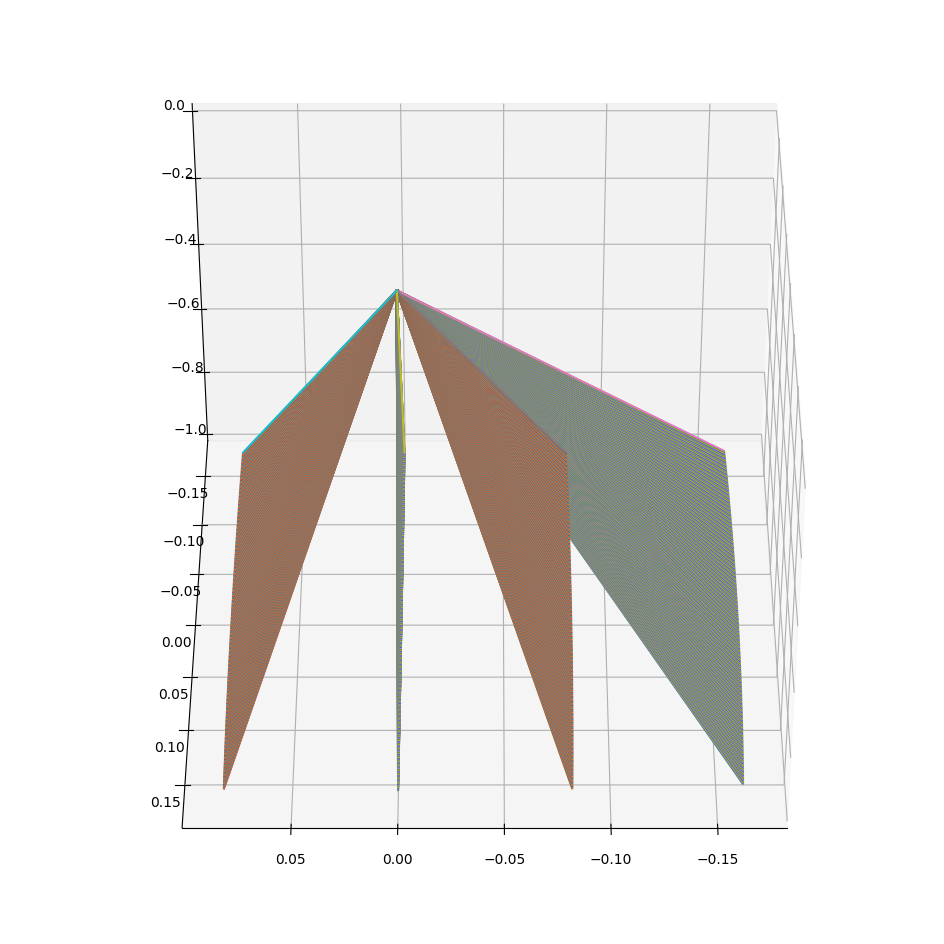

In [6]:
plot_rays(rays_o, rays_d, 1, every=100)

### Equation of a sphere
$$
\begin{align*}
(x-x_c)^2+(y-y_c)^2+(z-z_c)^2 &= r^2 \\
(o_x+t*d_x-x_c)^2+(o_y+t*d_y-y_c)^2+(o_z+t*d_z-z_c)^2 &= r^2 \\
\end{align*}
$$
where $x,y,z$ are the shell of the sphere, $x_c,y_c,z_c$ are the center of sphere, and $r$ is the radius. 

Since the ray has reached the object from the projection center, we need to solve $t$. So it is solving a quadratic equation...
$$at^2 + bt +c = 0$$
With more than 1 solution (root), it must satisfy,
$$b^2-4ac\geq 0$$

Expanding the sphere equation, it gives, 
$$
\begin{align*}
(o_x+t*d_x-x_c)^2+(o_y+t*d_y-y_c)^2+(o_z+t*d_z-z_c)^2 &= r^2 \\
(td_x+(o_x-x_c))^2 + (td_y+(o_y-y_c))^2 + (td_z+(o_z-z_c))^2-r^2 &= 0 \\
(d_x^2+d_y^2+d_z^2)t^2+2\big(d_x(o_x-x_c)+d_y(o_y-y_c)+d_z(o_z-z_c)\big)t+\big((o_x-x_c)^2+(o_y-y_c)^2+(o_z-z_c)^2-r^2\big) &=0\\
\end{align*}
$$

By comparing coefficients,
$$
\begin{align*}
a&=(d_x^2+d_y^2+d_z^2)\\
b&=2\big(d_x(o_x-x_c)+d_y(o_y-y_c)+d_z(o_z-z_c)\big)\\
c&=\big((o_x-x_c)^2+(o_y-y_c)^2+(o_z-z_c)^2-r^2\big)\\
\end{align*}
$$

### 3D Plot of Sphere
<img src="../../resources/sphere3d.png">
$$
\begin{align*}
& (x-x_0)^2+(y-y_0)^2+(z-z_0)^2 = r^2 \\
& = r^2\sin^2v + r^2\cos^2v \\
& = r^2\cos^2u\sin^2v + r^2\sin^2u\sin^2v + r^2\cos^2v \\
& = (x_0+r\cos u\sin v)^2+(y_0+r\sin u\sin v)^2+(z_0+r\cos v)^2
\end{align*}$$

In [7]:
class Sphere():
    def __init__(self, p, r, c):
        '''
        p position of the sphere
        r radius 
        c color
        '''
        self.p = p
        self.r = r
        self.c = c
        
    def intersect(self, o, d):
        '''
        o origin of the ray
        d direction of ray
        '''
        a,b,c = 0,0,0
        for i in range(3):
            a+=d[:,i]**2
            b+=2*d[:,i]*(o[:,i]-self.p[i])
            c+=(o[:,i]-self.p[i])**2
        c-=self.r**2
        
        pho = b**2-4*a*c
        cond = pho>=0
        
        num_rays = o.shape[0]
        colors = np.zeros((num_rays,3))
        colors[cond] = self.c
        
        return colors
    
    def locate(self, o=None, d=None, t=1, every=100):
        fig = plt.figure(figsize=(12,12))
        ax = plt.axes(projection='3d')
        
        if o is not None or d is not None:
            pt1 = o
            pt2 = o+t*d
            show1 = np.vstack((pt1[::every],pt1[-1]))
            show2 = np.vstack((pt2[::every],pt2[-1]))
#             print(show1.shape, pt1[-1].shape)
#             print(np.vstack((show1,pt1[-1])).shape)

            for p1,p2 in zip(show1, show2):
                ax.plot([p1[0],p2[0]],
                        [p1[1],p2[1]],
                        [p1[2],p2[2]])
        
        u,v = np.mgrid[-np.pi:np.pi:50j,0:np.pi:50j]
#         print(u[:10,:10])
        x = self.r*np.cos(u)*np.sin(v)
        y = self.r*np.sin(u)*np.sin(v)
        z = self.r*np.cos(v)
        ax.plot_surface(x+self.p[0], y+self.p[1], z+self.p[2], 
                        color=self.c, 
                        alpha=0.5*np.random.random()+0.5)
        
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.view_init(0, 90)
#         ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
#         ax.set_box_aspect(aspect = (1,1,1))
        ax.auto_scale_xyz([-1,1], [-1,1], [-1.8,-.2])

        plt.show()

In [8]:
s = Sphere(np.array([0.,0.,-1.]),
          .1,
          np.array([1.,0.,0.]))
c = s.intersect(rays_o, rays_d)
print(c.shape)

(160000, 3)


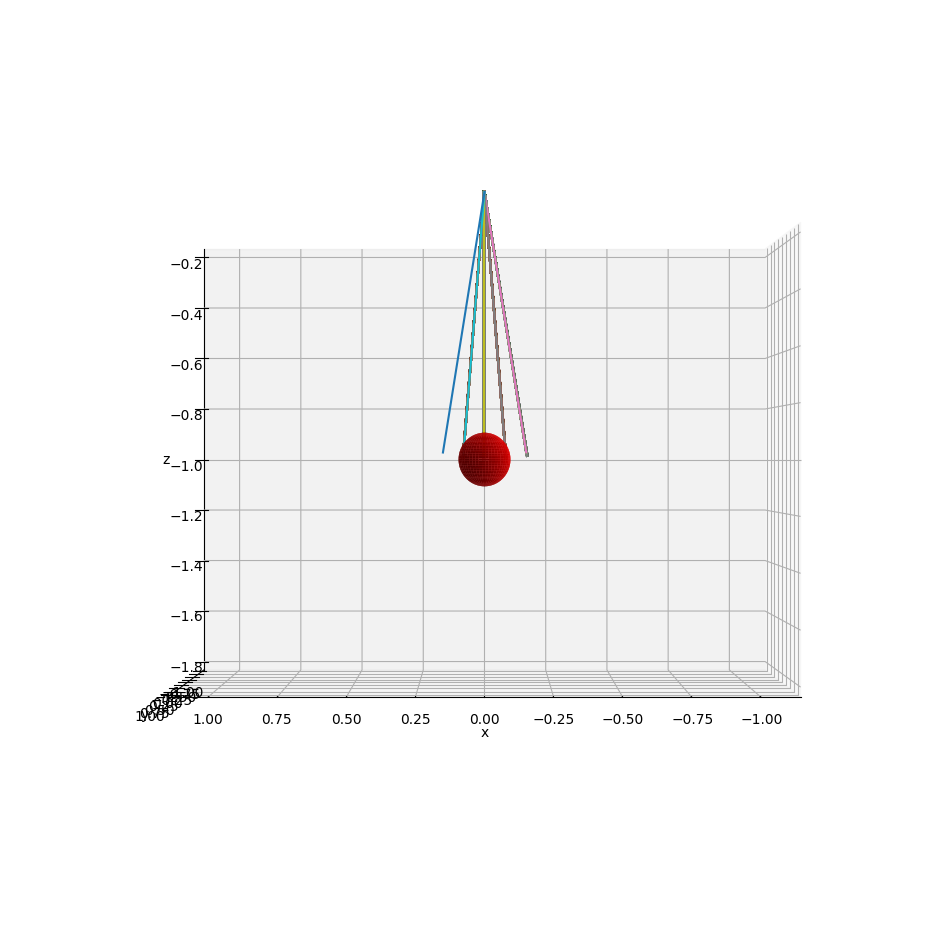

In [9]:
s.locate(o=rays_o, d=rays_d)

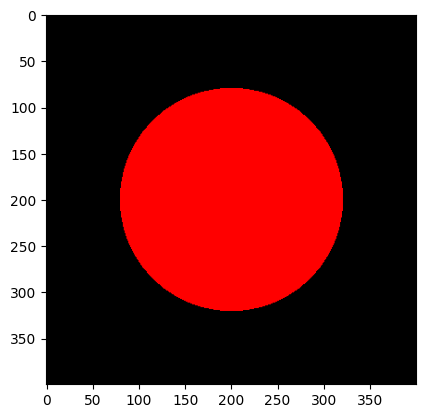

In [10]:
img = c.reshape(H, W, 3)
plt.imshow(img)
plt.show()